<a href="https://colab.research.google.com/github/yhdonnie/azml/blob/circleci-project-setup/azml-143_CNN-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras CNN 으로 패션 아이템 구분하기

1. 패키지 수입 및 파라미터 지정

In [1]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D
from keras.layers import Conv2D, InputLayer



In [2]:
# 파라미터
MY_EPOCH=100
MY_BATCH=500

2. 데이터 처리

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('학습용 입력 데이터', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)

print('평가용 입력 데이터', X_test.shape)
print('평가용 출력 데이터:', Y_test.shape)

학습용 입력 데이터 (60000, 28, 28)
학습용 출력 데이터: (60000,)
평가용 입력 데이터 (10000, 28, 28)
평가용 출력 데이터: (10000,)


학습용 데이터 첫번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

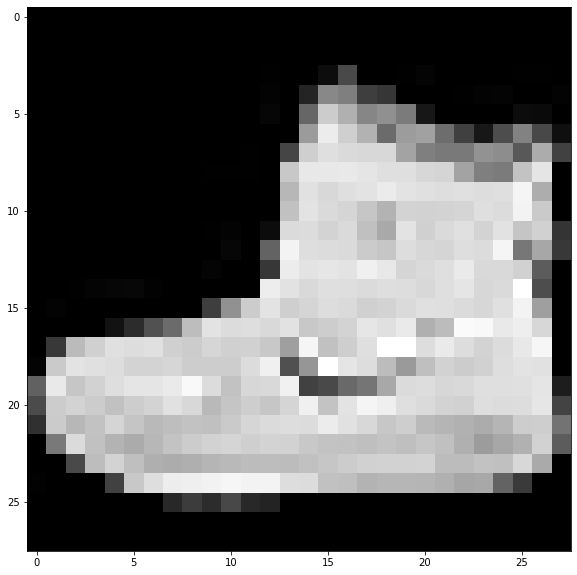

In [4]:
# 데이터 샘플 출력.. 범위 0-255 (8 bit)
print('학습용 데이터 첫번째 이미지 화소 정보')
print(X_train[0])
plt.figure(figsize=(10,10))
plt.imshow(X_train[0], cmap='gray')
print('학습용 데이터 첫번째 이미지의 라벨',Y_train[0])

In [5]:
# 데이터 스케일링 
X_train = X_train / 255.0
print(X_train[0])
X_test = X_test /255.0

# 이미지 채널 정보 추가 (흑백=1, 칼라=3  RGB)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [6]:
#  라벨 정보 수정 ("one hot encoding") 이진수로 바꿈
Y_train = np_utils.to_categorical(Y_train, 10)
print('학습용 데이터 첫번째 이미지의 라벨',Y_train[0])
Y_test = np_utils.to_categorical(Y_test,10)

print('학습용 입력 데이터', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)

print('평가용 입력 데이터', X_test.shape)
print('평가용 출력 데이터:', Y_test.shape)


학습용 데이터 첫번째 이미지의 라벨 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터 (60000, 28, 28, 1)
학습용 출력 데이터: (60000, 10)
평가용 입력 데이터 (10000, 28, 28, 1)
평가용 출력 데이터: (10000, 10)


3. 인공 신경망 구현

In [7]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))

# 첫번째 합성곱 블럭 (conv+pooling)
model.add(Conv2D(filters=32,
                 kernel_size=2, 
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭 (conv+pooling)
model.add(Conv2D(filters=64,
                 kernel_size=2, 
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# DNN 입성 (flatten 을 사용하여 은닉층으로 들어감)
model.add(Flatten())

model.add(Dense(units=128,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

print('CNN요약')
model.summary()

CNN요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)           

4. 인공신경망 학습

In [8]:
#  학습환경, 학습 방식 설정

model.compile(optimizer='adam',
#model.compile(optimizer='sgd',
            #    loss='categorical_crossentropy',
               loss='mse',
#               loss='mae',
               metrics=['acc'])

#  CNN 학습 (verbose 결과를 출력할 것인가 말것인가)

print("학습 시작")
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end = time()
print('학습시간: {:.2f}'.format(end-begin))


학습 시작
Epoch 1/100
120/120 [==============================] - 4s 10ms/step - loss: 0.0483 - acc: 0.6547
Epoch 2/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0206 - acc: 0.8591
Epoch 3/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0180 - acc: 0.8779
Epoch 4/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0166 - acc: 0.8871
Epoch 5/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0150 - acc: 0.8990
Epoch 6/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0142 - acc: 0.9057
Epoch 7/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0138 - acc: 0.9064
Epoch 8/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0133 - acc: 0.9116
Epoch 9/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0123 - acc: 0.9176
Epoch 10/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0123 - acc: 0.9181
Epoch 11/100
120/120 [=

In [9]:
# 위에서 120은 회수 (6만개를 500개씩 가져오면 batch는 120번 가져와야 함)

In [10]:
# CNN  평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=1)

print('최종 손실값: {:.2f}'.format(score[0]))
print('최종 정확도: {:.2f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0144 - acc: 0.9136
최종 손실값: 0.01
최종 정확도: 0.91


6.  CNN  예측

In [11]:
# 샘플 이미지 지정
image = X_test[1234]
print(image.shape)

# batch 정보 추가 (1: batch 1개씩 가져온다는 뜻)
image = image.reshape(1, 28, 28, 1)
pred = model.predict(image)

# 정보 출력 (softmax 처리가 된 10개 확률)
print('CNN 예측 값', pred)
print('정답:', Y_test[1234])



(28, 28, 1)
CNN 예측 값 [[3.8960189e-12 5.5858369e-12 3.8311967e-01 4.4843141e-13 6.1679751e-01
  3.4467600e-16 8.2784856e-05 2.5586510e-16 8.6447030e-12 1.8021623e-13]]
정답: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


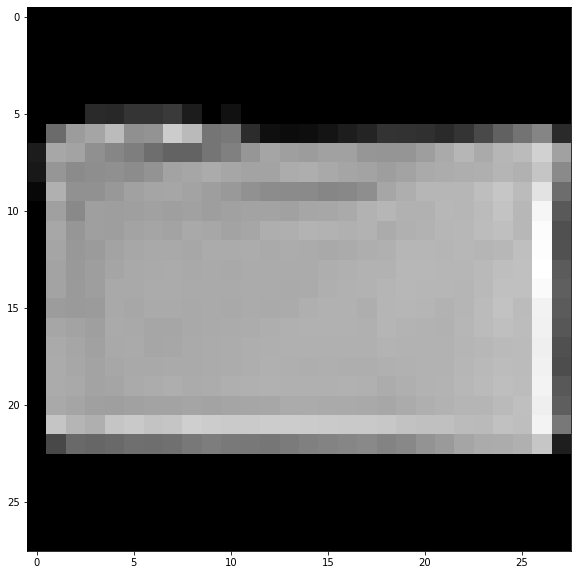

In [12]:
# 1234   번째 데이터 그리기 (정규화 255 나눈거 다시 곱해줌)

plt.figure(figsize=(10,10))
tmp = X_train[1234].reshape(28,28)
tmp = tmp*255
plt.imshow(tmp, cmap='gray')